In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

pd.set_option("max_columns", 50)

# Load Data

In [2]:
database = pd.read_csv(r"../../data/metadata.csv")

database.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARM,NaN,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FACE,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [3]:
database = database[['smoke','drink','background_father','background_mother','age','pesticide','gender','skin_cancer_history','cancer_history','has_piped_water','has_sewage_system','fitspatrick','region','diameter_1','diameter_2','itch','grew','hurt','changed','bleed','elevation','diagnostic','biopsed']]

database.head(10)

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,itch,grew,hurt,changed,bleed,elevation,diagnostic,biopsed
0,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARM,NaN,NaN,False,False,False,False,False,False,NEV,False
1,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,True,True,False,True,True,True,BCC,True
2,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FACE,NaN,NaN,True,False,False,False,False,False,ACK,False
3,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,True,False,False,False,False,False,ACK,False
4,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,True,True,False,False,True,True,BCC,True
5,NaN,NaN,NaN,NaN,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEST,NaN,NaN,True,False,False,False,False,True,SEK,False
6,False,True,GERMANY,ITALY,52,False,FEMALE,False,True,True,True,3.0,FACE,15.0,10.0,False,True,False,True,True,True,BCC,True
7,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,False,False,False,1.0,FACE,15.0,10.0,True,True,True,False,True,True,BCC,True
8,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOREARM,NaN,NaN,True,False,False,True,False,False,ACK,False
9,False,True,GERMANY,GERMANY,58,True,FEMALE,True,True,True,True,1.0,FOREARM,9.0,7.0,False,True,False,False,False,False,ACK,False


In [4]:
database[['smoke','drink','pesticide','skin_cancer_history','cancer_history','has_piped_water','has_sewage_system','itch','grew','hurt','changed','bleed','elevation','biopsed']] = database[['smoke','drink','pesticide','skin_cancer_history','cancer_history','has_piped_water','has_sewage_system','itch','grew','hurt','changed','bleed','elevation','biopsed']].astype("bool")

In [5]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   smoke                2298 non-null   bool   
 1   drink                2298 non-null   bool   
 2   background_father    1480 non-null   object 
 3   background_mother    1476 non-null   object 
 4   age                  2298 non-null   int64  
 5   pesticide            2298 non-null   bool   
 6   gender               1494 non-null   object 
 7   skin_cancer_history  2298 non-null   bool   
 8   cancer_history       2298 non-null   bool   
 9   has_piped_water      2298 non-null   bool   
 10  has_sewage_system    2298 non-null   bool   
 11  fitspatrick          1494 non-null   float64
 12  region               2298 non-null   object 
 13  diameter_1           1494 non-null   float64
 14  diameter_2           1494 non-null   float64
 15  itch                 2298 non-null   b

In [6]:
database.loc[~database.fitspatrick.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 1 to 2296
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   smoke                1494 non-null   bool   
 1   drink                1494 non-null   bool   
 2   background_father    1480 non-null   object 
 3   background_mother    1476 non-null   object 
 4   age                  1494 non-null   int64  
 5   pesticide            1494 non-null   bool   
 6   gender               1494 non-null   object 
 7   skin_cancer_history  1494 non-null   bool   
 8   cancer_history       1494 non-null   bool   
 9   has_piped_water      1494 non-null   bool   
 10  has_sewage_system    1494 non-null   bool   
 11  fitspatrick          1494 non-null   float64
 12  region               1494 non-null   object 
 13  diameter_1           1494 non-null   float64
 14  diameter_2           1494 non-null   float64
 15  itch                 1494 non-null   b

# Data Exploration

In [7]:
database.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2298.0,60.464752,15.894866,6.0,52.0,62.0,72.0,94.0
fitspatrick,1494.0,2.265730,0.729029,1.0,2.0,2.0,3.0,6.0
diameter_1,1494.0,11.897055,8.634492,0.0,7.0,10.0,15.0,100.0
diameter_2,1494.0,8.852209,5.797036,0.0,5.0,8.0,10.0,70.0


In [8]:
database[['background_father']].value_counts()

background_father
POMERANIA            530
GERMANY              466
ITALY                250
UNK                   95
BRAZIL                89
NETHERLANDS           19
PORTUGAL              15
POLAND                 7
BRASIL                 3
CZECH                  3
AUSTRIA                1
ISRAEL                 1
SPAIN                  1
dtype: int64

In [9]:
database[['background_mother']].value_counts()

background_mother
POMERANIA            533
GERMANY              482
ITALY                236
UNK                   84
BRAZIL                81
NETHERLANDS           20
PORTUGAL              20
POLAND                 9
NORWAY                 7
FRANCE                 2
SPAIN                  2
dtype: int64

In [10]:
database[['gender']].value_counts()

gender
FEMALE    753
MALE      741
dtype: int64

In [11]:
database[['region']].value_counts()

region 
FACE       570
FOREARM    392
CHEST      280
BACK       248
ARM        192
NOSE       158
HAND       126
NECK        93
EAR         73
THIGH       73
ABDOMEN     36
LIP         23
SCALP       18
FOOT        16
dtype: int64

In [12]:
database[['fitspatrick']].value_counts()

fitspatrick
2.0            876
3.0            392
1.0            153
4.0             62
5.0             10
6.0              1
dtype: int64

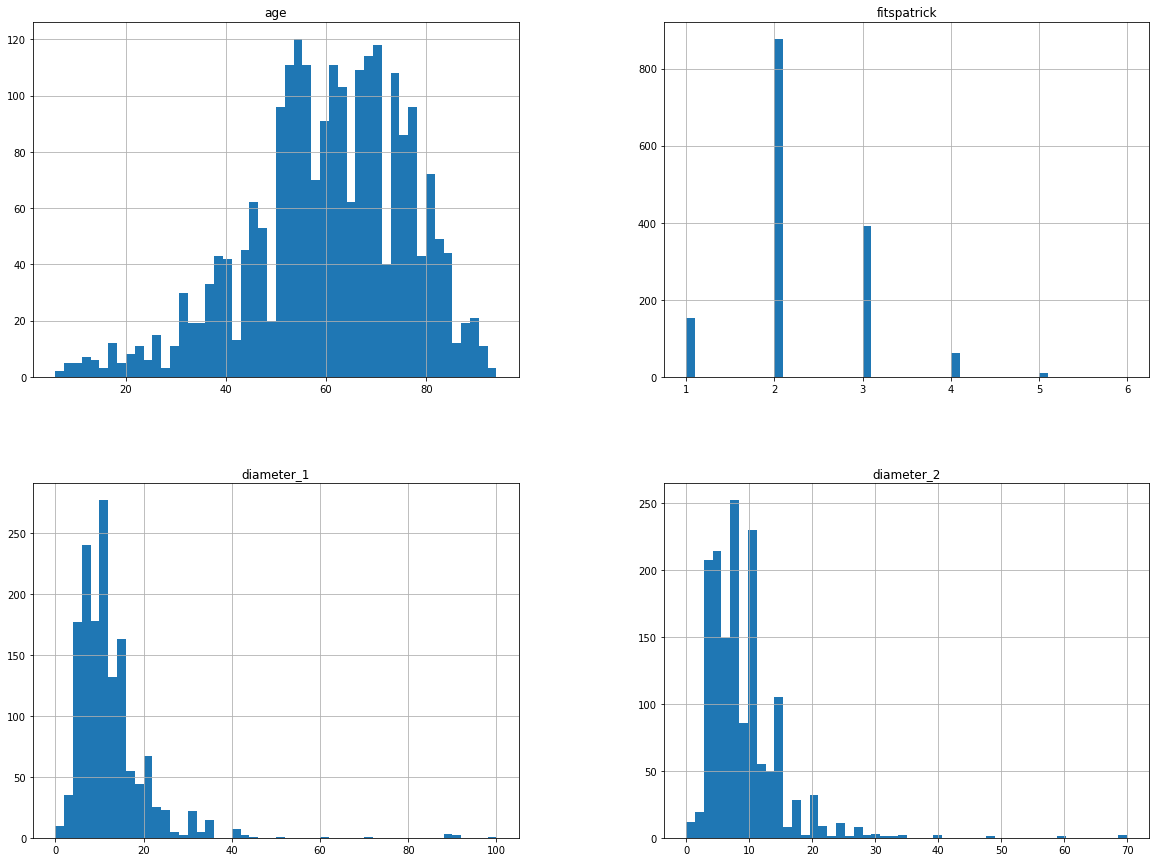

In [13]:
database.hist(bins=50, figsize=(20, 15))
plt.show()

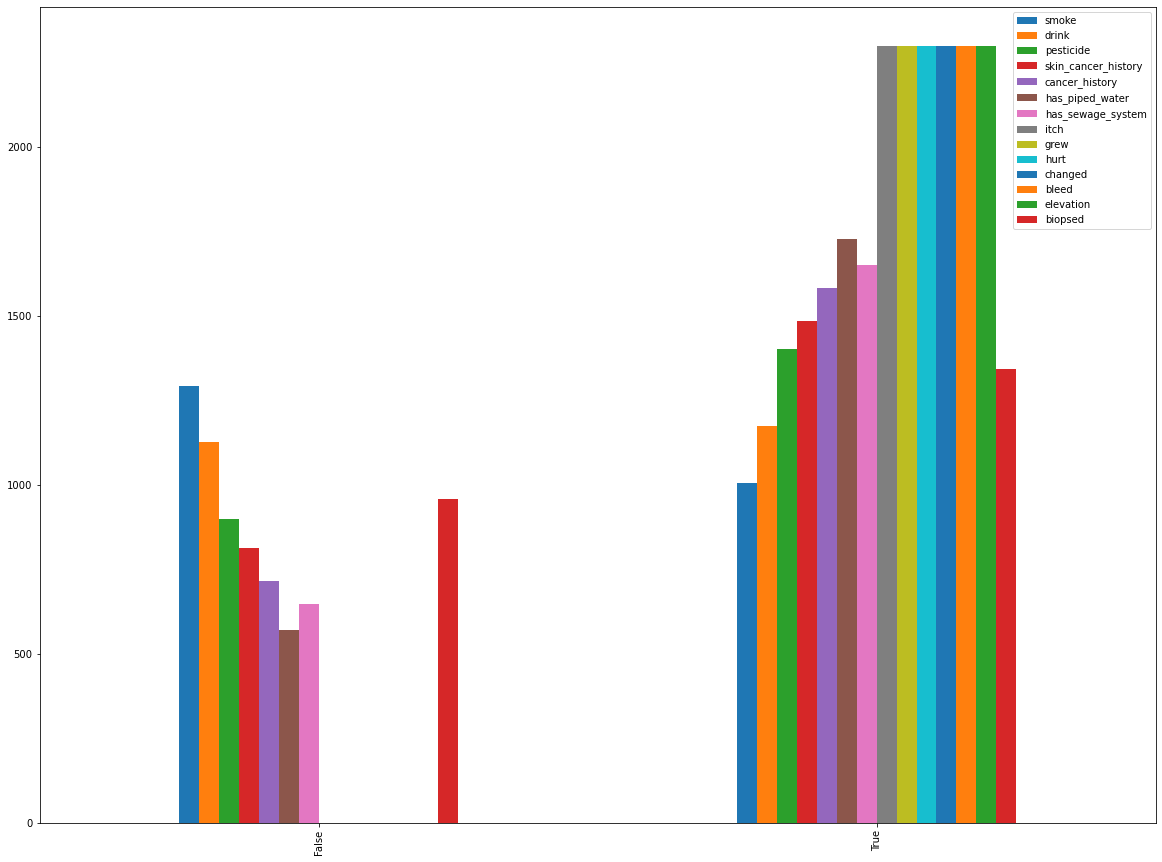

In [14]:
database.select_dtypes(include='bool').apply(pd.value_counts).plot.bar(figsize=(20, 15));

# Train Test Split

In [15]:
df  = database.loc[~database.fitspatrick.isna()]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 1 to 2296
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   smoke                1494 non-null   bool   
 1   drink                1494 non-null   bool   
 2   background_father    1480 non-null   object 
 3   background_mother    1476 non-null   object 
 4   age                  1494 non-null   int64  
 5   pesticide            1494 non-null   bool   
 6   gender               1494 non-null   object 
 7   skin_cancer_history  1494 non-null   bool   
 8   cancer_history       1494 non-null   bool   
 9   has_piped_water      1494 non-null   bool   
 10  has_sewage_system    1494 non-null   bool   
 11  fitspatrick          1494 non-null   float64
 12  region               1494 non-null   object 
 13  diameter_1           1494 non-null   float64
 14  diameter_2           1494 non-null   float64
 15  itch                 1494 non-null   b

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

df = df.dropna()

transformer = make_column_transformer((OneHotEncoder(categories='auto'), ['background_father','background_mother','region','gender']), remainder='passthrough')

transformed = transformer.fit_transform(df)

transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

In [18]:
transformed_df.head()

,onehotencoder__x0_AUSTRIA,onehotencoder__x0_BRASIL,onehotencoder__x0_BRAZIL,onehotencoder__x0_CZECH,onehotencoder__x0_GERMANY,onehotencoder__x0_ISRAEL,onehotencoder__x0_ITALY,onehotencoder__x0_NETHERLANDS,onehotencoder__x0_POLAND,onehotencoder__x0_POMERANIA,onehotencoder__x0_PORTUGAL,onehotencoder__x0_SPAIN,onehotencoder__x0_UNK,onehotencoder__x1_BRAZIL,onehotencoder__x1_FRANCE,onehotencoder__x1_GERMANY,onehotencoder__x1_ITALY,onehotencoder__x1_NETHERLANDS,onehotencoder__x1_NORWAY,onehotencoder__x1_POLAND,onehotencoder__x1_POMERANIA,onehotencoder__x1_PORTUGAL,onehotencoder__x1_SPAIN,onehotencoder__x1_UNK,onehotencoder__x2_ABDOMEN,...,onehotencoder__x2_NECK,onehotencoder__x2_NOSE,onehotencoder__x2_SCALP,onehotencoder__x2_THIGH,onehotencoder__x3_FEMALE,onehotencoder__x3_MALE,smoke,drink,age,pesticide,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,diameter_1,diameter_2,itch,grew,hurt,changed,bleed,elevation,diagnostic,biopsed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,False,False,55,False,True,True,True,True,3.0,6.0,5.0,True,True,True,True,True,True,BCC,True
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,False,True,79,False,True,False,False,False,1.0,5.0,5.0,True,True,True,True,True,True,BCC,True
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,52,False,False,True,True,True,3.0,15.0,10.0,True,True,True,True,True,True,BCC,True
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,False,74,True,False,False,False,False,1.0,15.0,10.0,True,True,True,True,True,True,BCC,True
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,58,True,True,True,True,True,1.0,9.0,7.0,True,True,True,True,True,True,ACK,False


In [19]:
transformed_df = transformed_df.drop('diagnostic', axis = 1).astype('float64')

In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    transformed_df,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

In [21]:
X_train = train_set.drop(columns=['biopsed']).copy()
y_train = train_set['biopsed'].copy()

X_test = test_set.drop(columns=['biopsed']).copy()
y_test = test_set['biopsed'].copy()

# Predict

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

c:\Users\samuel.nporto\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
from sklearn.metrics import f1_score
from sklearn import metrics

y_pred = log_reg.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

F1 score: 0.9350180505415162
Accuracy: 0.8779661016949153
Precision: 0.8809523809523809
Recall: 0.9961538461538462
